<a href="https://colab.research.google.com/github/Brindabollu/Brindabollu/blob/main/Martial%20status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/maritial status 2011.csv')
df.head(n=25)

,s,total_m,total_f,never_married_t,never_married_m,never_married_f,curr_married_t,curr_married_m,curr_married_f,widowed_t,widowed_m,widowed_f,separated_t,separated_m,separated_f,divorced_t,divorced_m,divorced_f,class
0,1210854977,623270258,587584719,570833969,322870527,247963442,579584783,286507311,293077472,55538707,12277229,43261478,3535202,1162448,2372754,1362316,452743,909573,0
1,132709212,69418835,63290377,129790438,68312261,61478177,2742714,1032903,1709811,100477,36830,63647,63478,31232,32246,12105,5609,6496,0
2,120526449,63982396,56544053,106188765,60873986,45314779,14010633,2999621,11011012,193733,63249,130484,101818,37223,64595,31500,8317,23183,0
3,111424222,57584693,53839529,56175036,39810362,16364674,54417955,17536278,36881677,437226,125774,311452,276865,81864,195001,117140,30415,86725,0
4,101413965,51344208,50069757,20948980,16551438,4397542,78981469,34374811,44606658,873244,230746,642498,422608,128577,294031,187664,58636,129028,0
5,88594951,44660674,43934277,6480174,5040404,1439770,79987358,39056059,40931299,1439180,343170,1096010,476673,148419,328254,211566,72622,138944,0
6,85140684,42919381,42221303,2731904,1961245,770659,79349364,40230399,39118965,2328273,488916,1839357,517039,163218,353821,214104,75603,138501,0
7,72438112,37545386,34892726,1558004,1053138,504866,67014828,35626363,31388465,3224938,655785,2569153,461425,147730,313695,178917,62370,116547,0
8,62318327,32138114,30180213,1002207,639703,362504,56741611,30533274,26208337,4072051,802340,3269711,369587,117276,252311,132871,45521,87350,0
9,49069254,25843266,23225988,743984,457795,286189,42991315,24268449,18722866,4969517,997044,3972473,270358,88259,182099,94080,31719,62361,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   s                3937 non-null   int64
 1   total_m          3937 non-null   int64
 2   total_f          3937 non-null   int64
 3   never_married_t  3937 non-null   int64
 4   never_married_m  3937 non-null   int64
 5   never_married_f  3937 non-null   int64
 6   curr_married_t   3937 non-null   int64
 7   curr_married_m   3937 non-null   int64
 8   curr_married_f   3937 non-null   int64
 9   widowed_t        3937 non-null   int64
 10  widowed_m        3937 non-null   int64
 11  widowed_f        3937 non-null   int64
 12  separated_t      3937 non-null   int64
 13  separated_m      3937 non-null   int64
 14  separated_f      3937 non-null   int64
 15  divorced_t       3937 non-null   int64
 16  divorced_m       3937 non-null   int64
 17  divorced_f       3937 non-null   int64
 18  class   

In [ ]:
y = df['class']
target = df['class'].to_numpy()

In [ ]:
X = df.iloc[:,0:7]
X.head(10)

,s,total_m,total_f,never_married_t,never_married_m,never_married_f,curr_married_t
0,1210854977,623270258,587584719,570833969,322870527,247963442,579584783
1,132709212,69418835,63290377,129790438,68312261,61478177,2742714
2,120526449,63982396,56544053,106188765,60873986,45314779,14010633
3,111424222,57584693,53839529,56175036,39810362,16364674,54417955
4,101413965,51344208,50069757,20948980,16551438,4397542,78981469
5,88594951,44660674,43934277,6480174,5040404,1439770,79987358
6,85140684,42919381,42221303,2731904,1961245,770659,79349364
7,72438112,37545386,34892726,1558004,1053138,504866,67014828
8,62318327,32138114,30180213,1002207,639703,362504,56741611
9,49069254,25843266,23225988,743984,457795,286189,42991315


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s,3937.0,3.432130e+06,2.955539e+07,0.0,9270.0,59770.0,666519.0,1.210855e+09
total_m,3937.0,1.775290e+06,1.527593e+07,0.0,4894.0,31010.0,338240.0,6.232703e+08
total_f,3937.0,1.656840e+06,1.428098e+07,0.0,4283.0,28580.0,329515.0,5.875847e+08
never_married_t,3937.0,2.077324e+06,1.880494e+07,0.0,419.0,9157.0,112115.0,5.708340e+08
never_married_m,3937.0,1.146750e+06,1.029244e+07,0.0,264.0,5506.0,66136.0,3.228705e+08
never_married_f,3937.0,9.305739e+05,8.528667e+06,0.0,147.0,3290.0,44524.0,2.479634e+08
curr_married_t,3937.0,1.229415e+06,1.251795e+07,0.0,1911.0,16098.0,191260.0,5.795848e+08


In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s,3937.0,-7.219129e-18,1.000127,-0.116140,-0.115826,-0.114118,-0.093586,40.858071
total_m,3937.0,0.000000e+00,1.000127,-0.116230,-0.115909,-0.114199,-0.094085,40.689752
total_f,3937.0,-1.443826e-17,1.000127,-0.116032,-0.115732,-0.114030,-0.092955,41.033769
never_married_t,3937.0,0.000000e+00,1.000127,-0.110481,-0.110459,-0.109994,-0.104518,30.248907
never_married_m,3937.0,1.443826e-17,1.000127,-0.111431,-0.111405,-0.110896,-0.105004,31.262239
never_married_f,3937.0,-7.219129e-18,1.000127,-0.109125,-0.109108,-0.108739,-0.103904,28.968684
curr_married_t,3937.0,0.000000e+00,1.000127,-0.098225,-0.098072,-0.096938,-0.082944,46.207966


In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

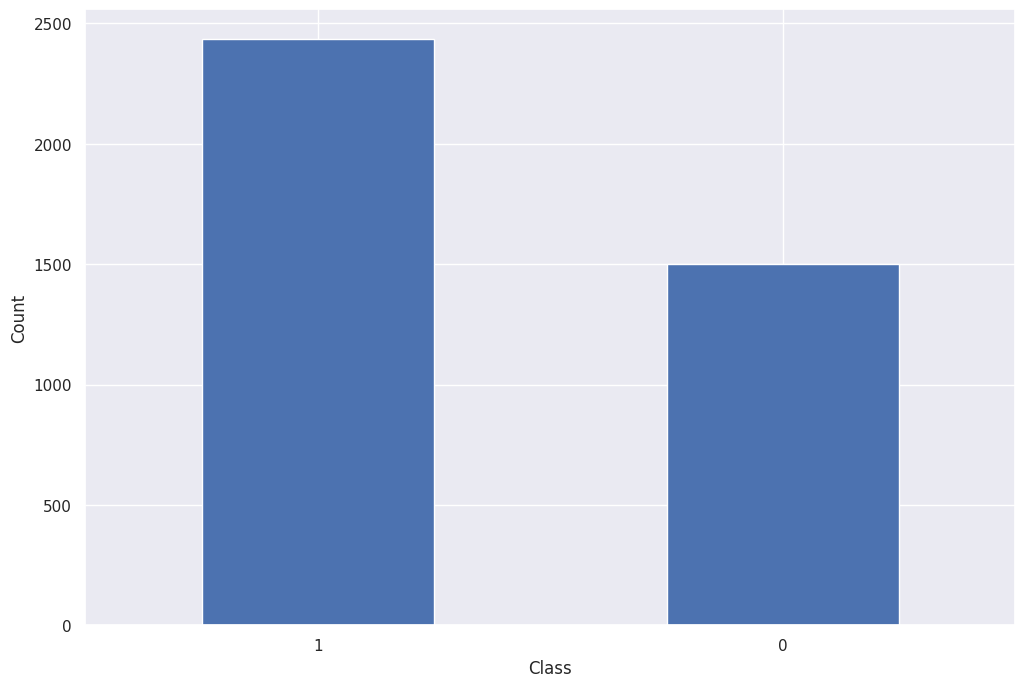

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<ipython-input-22-8636047648c8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=10);


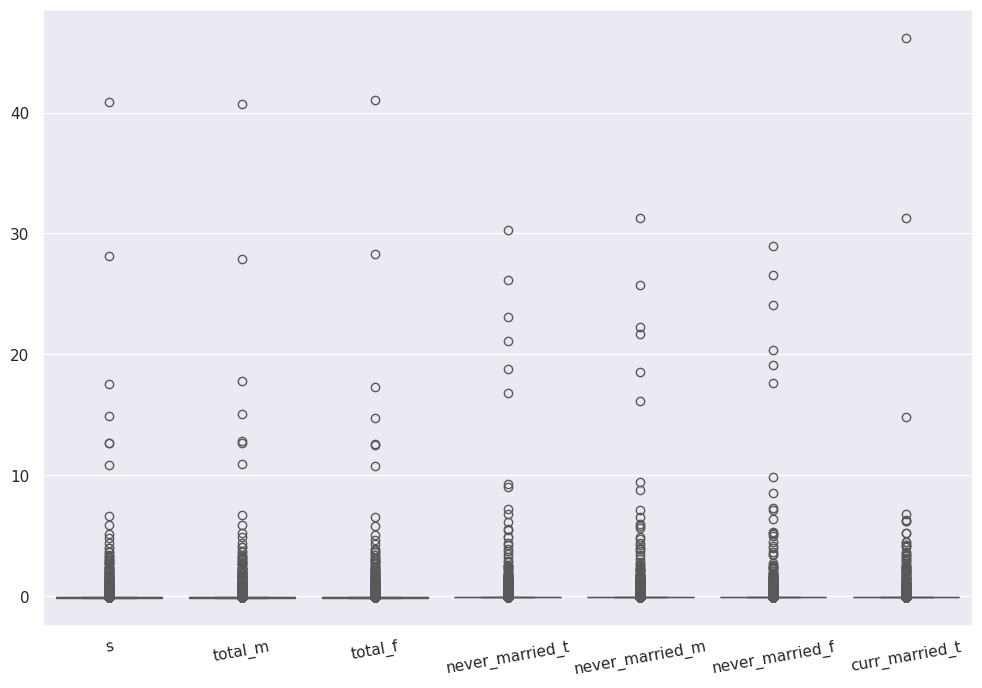

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=10);

In [ ]:
df.describe()

,s,total_m,total_f,never_married_t,never_married_m,never_married_f,curr_married_t
count,3.937000e+03,3937.000000,3.937000e+03,3937.000000,3.937000e+03,3.937000e+03,3937.000000
mean,-7.219129e-18,0.000000,-1.443826e-17,0.000000,1.443826e-17,-7.219129e-18,0.000000
std,1.000127e+00,1.000127,1.000127e+00,1.000127,1.000127e+00,1.000127e+00,1.000127
min,-1.161401e-01,-0.116230,-1.160320e-01,-0.110481,-1.114309e-01,-1.091252e-01,-0.098225
25%,-1.158264e-01,-0.115909,-1.157320e-01,-0.110459,-1.114053e-01,-1.091079e-01,-0.098072
50%,-1.141175e-01,-0.114199,-1.140305e-01,-0.109994,-1.108959e-01,-1.087394e-01,-0.096938
75%,-9.358571e-02,-0.094085,-9.295536e-02,-0.104518,-1.050044e-01,-1.039040e-01,-0.082944
max,4.085807e+01,40.689752,4.103377e+01,30.248907,3.126224e+01,2.896868e+01,46.207966


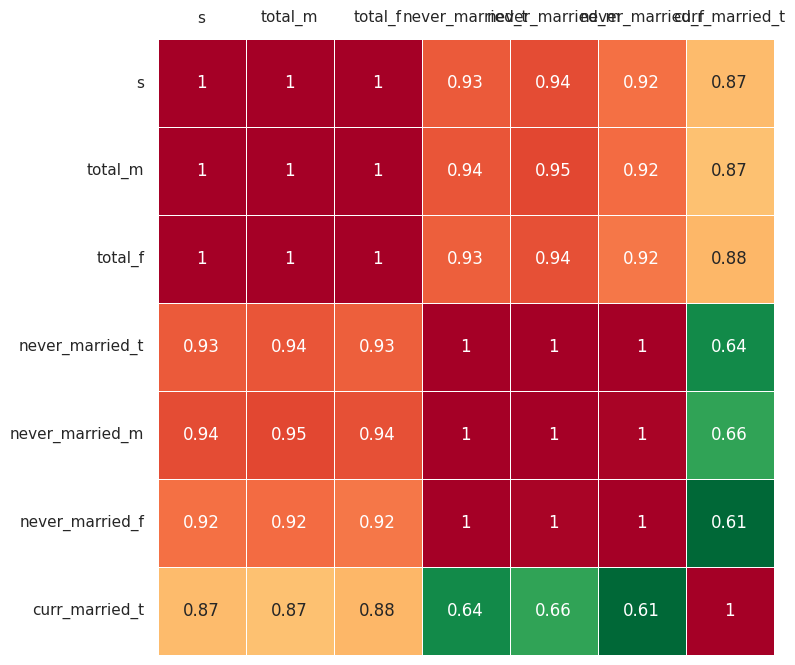

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

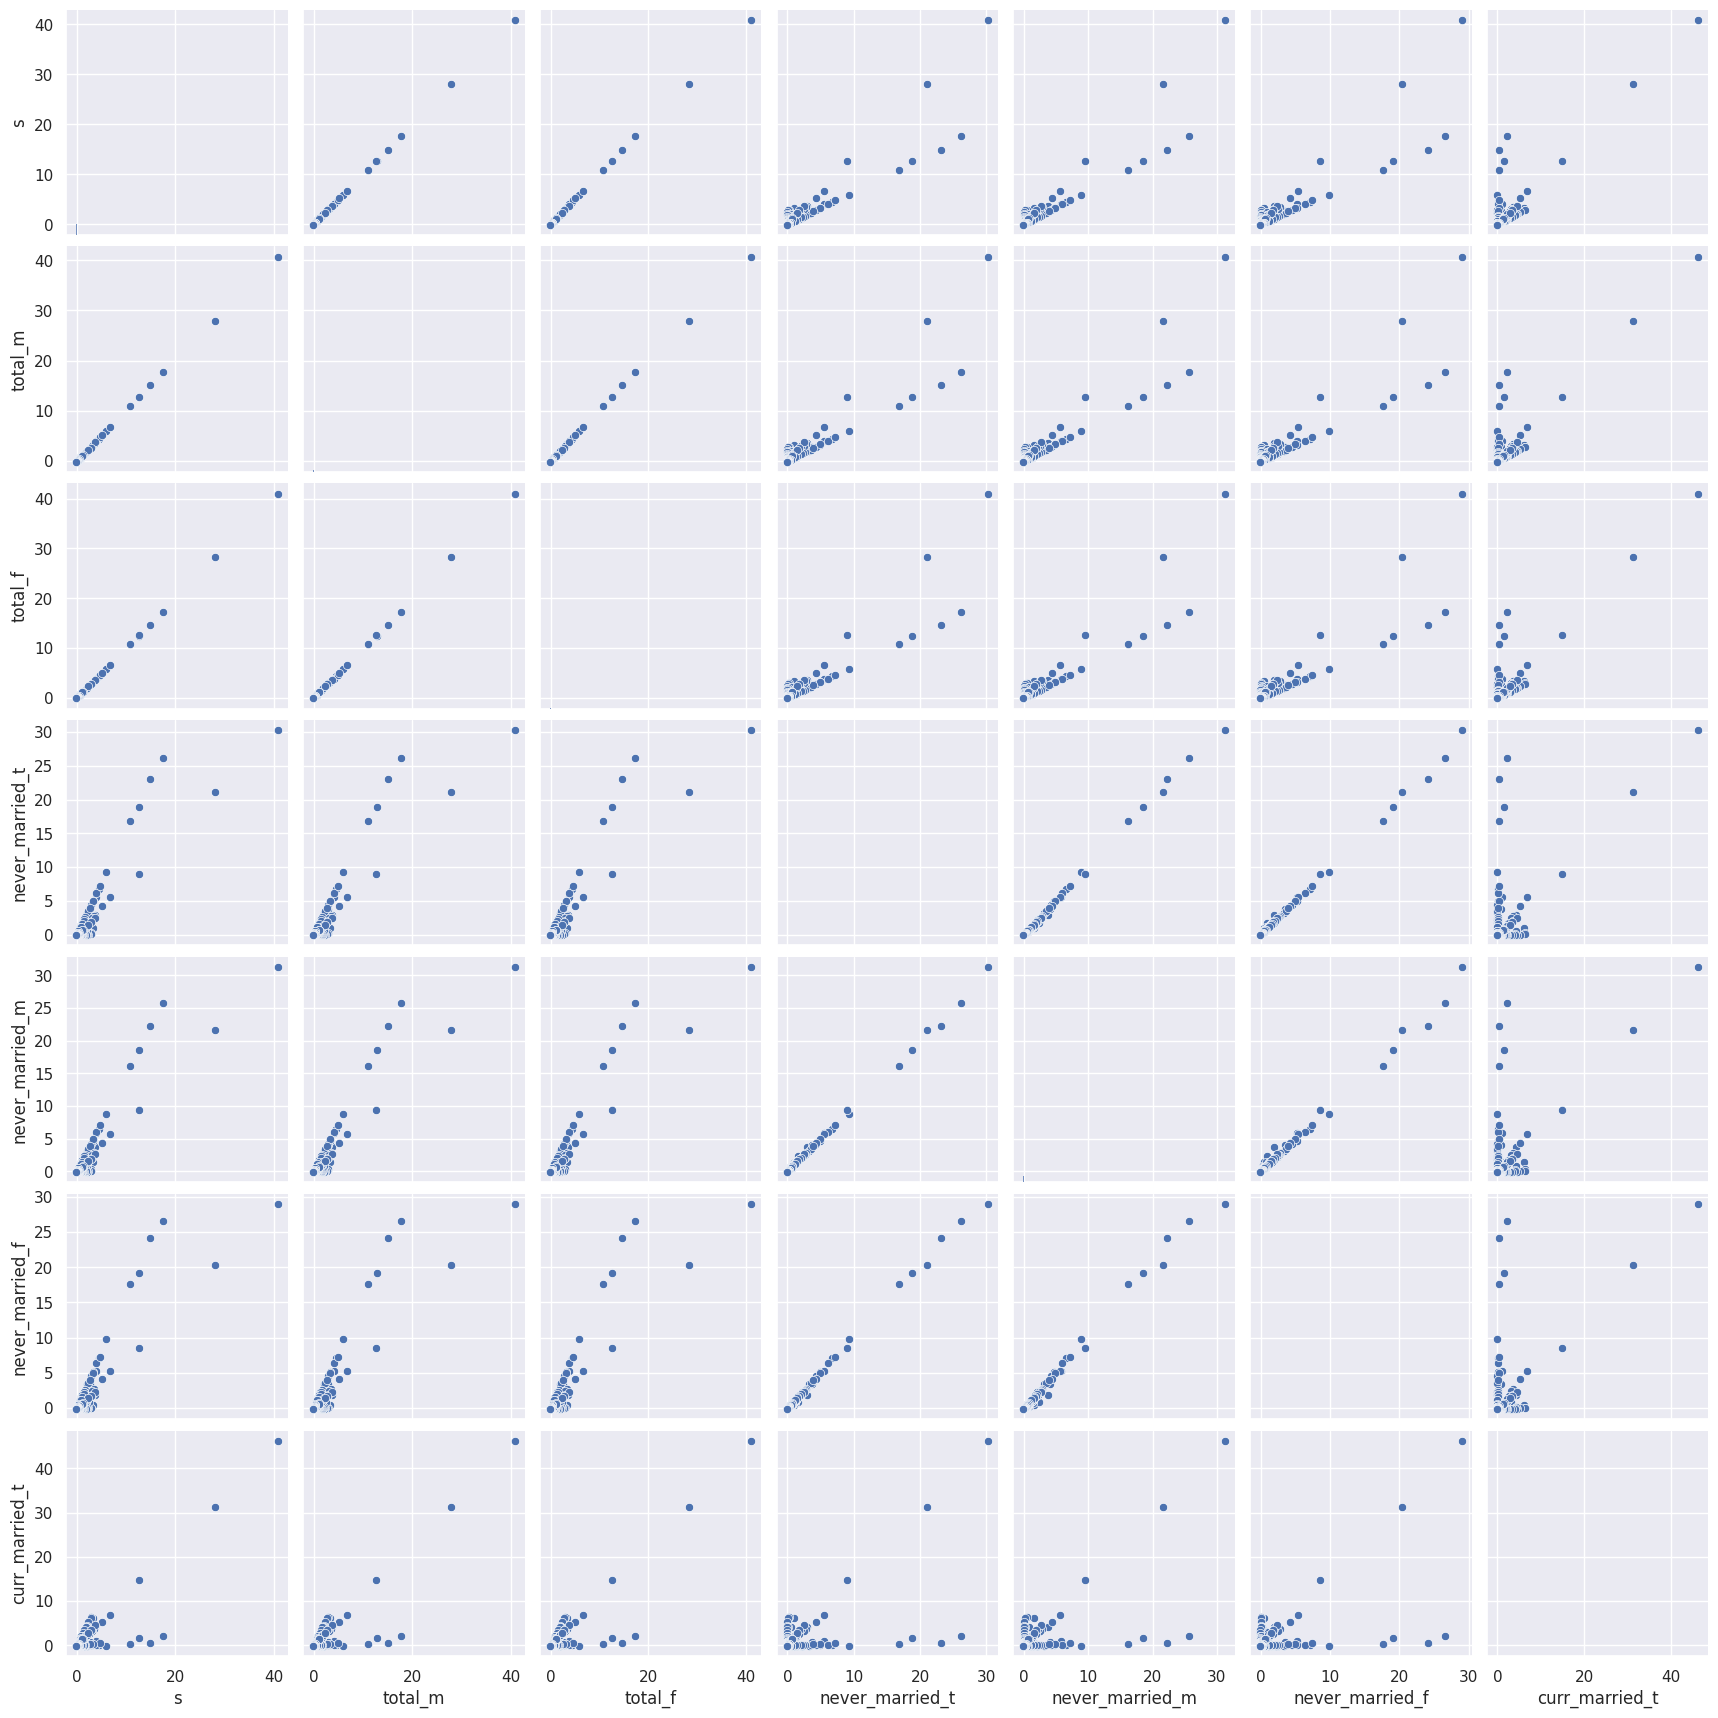

In [ ]:
sns.pairplot(df)

<ipython-input-25-44331237d1c1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=10);


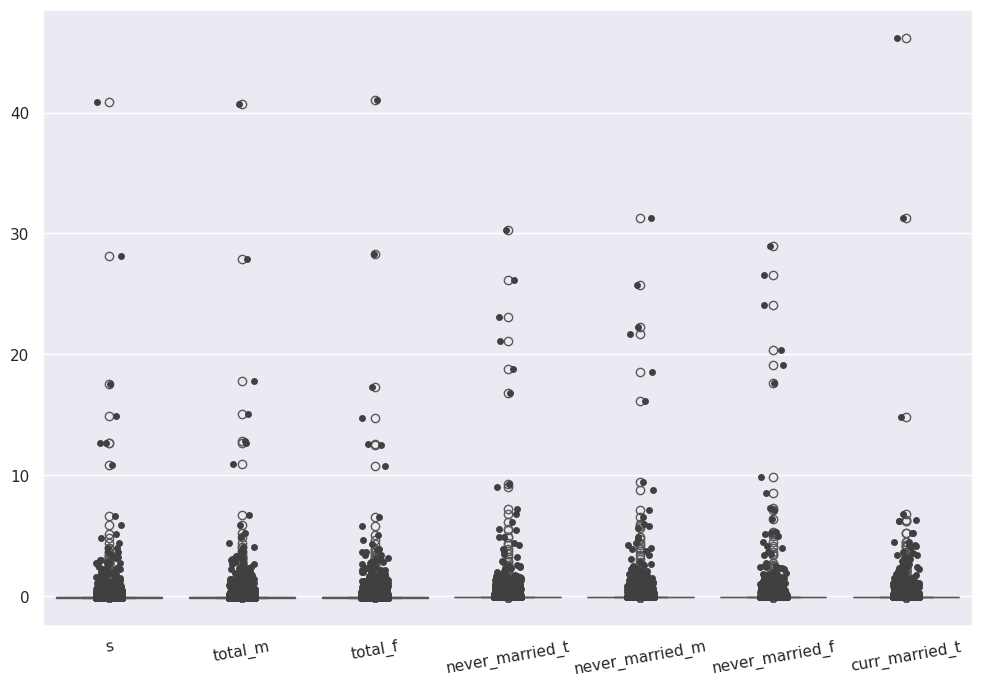

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=10);

Text(0, 0.5, 'Z2')

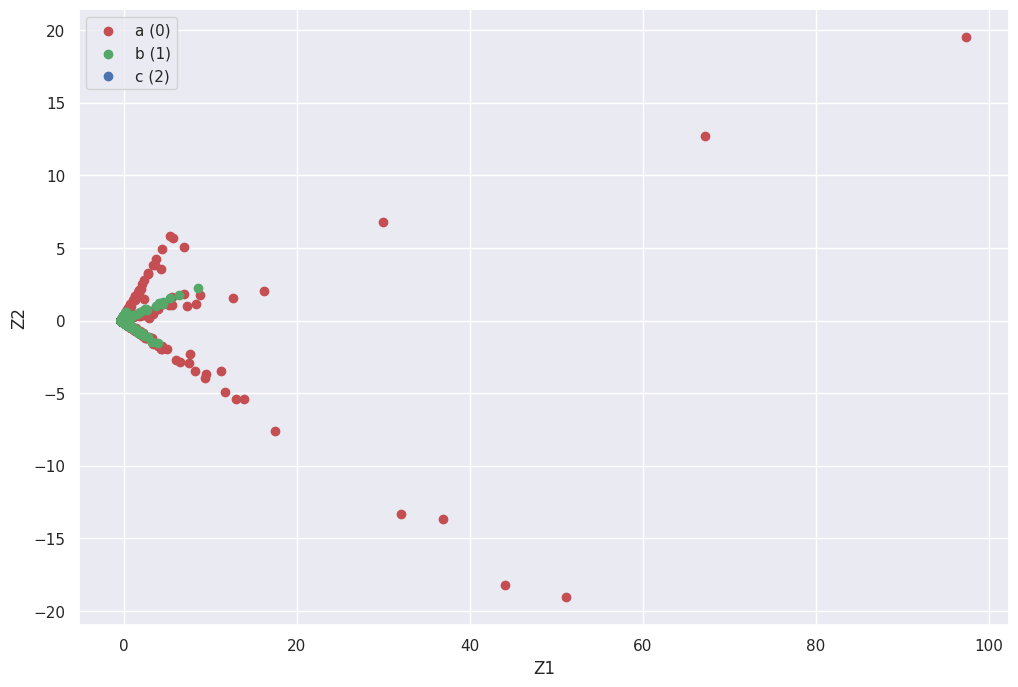

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='a (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='b (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='c (2)')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

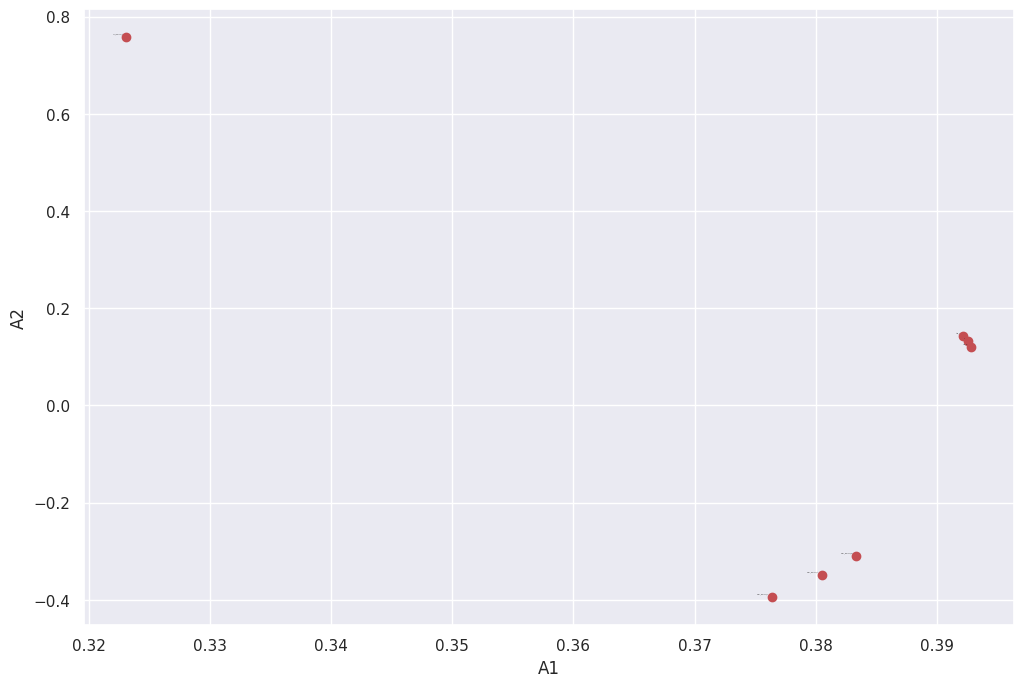

In [ ]:
A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


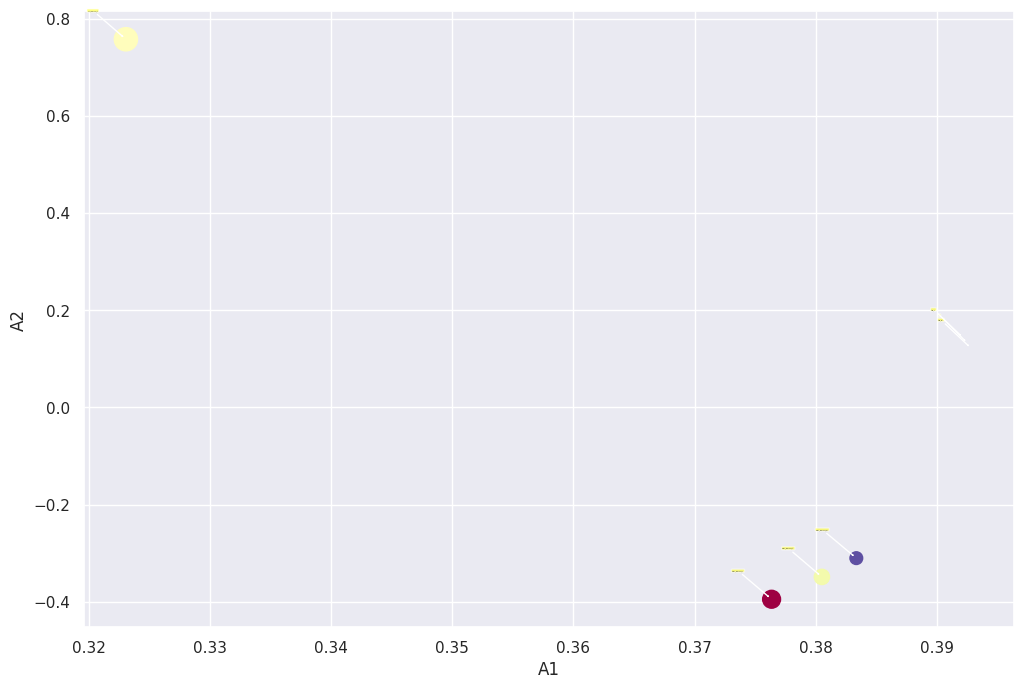

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

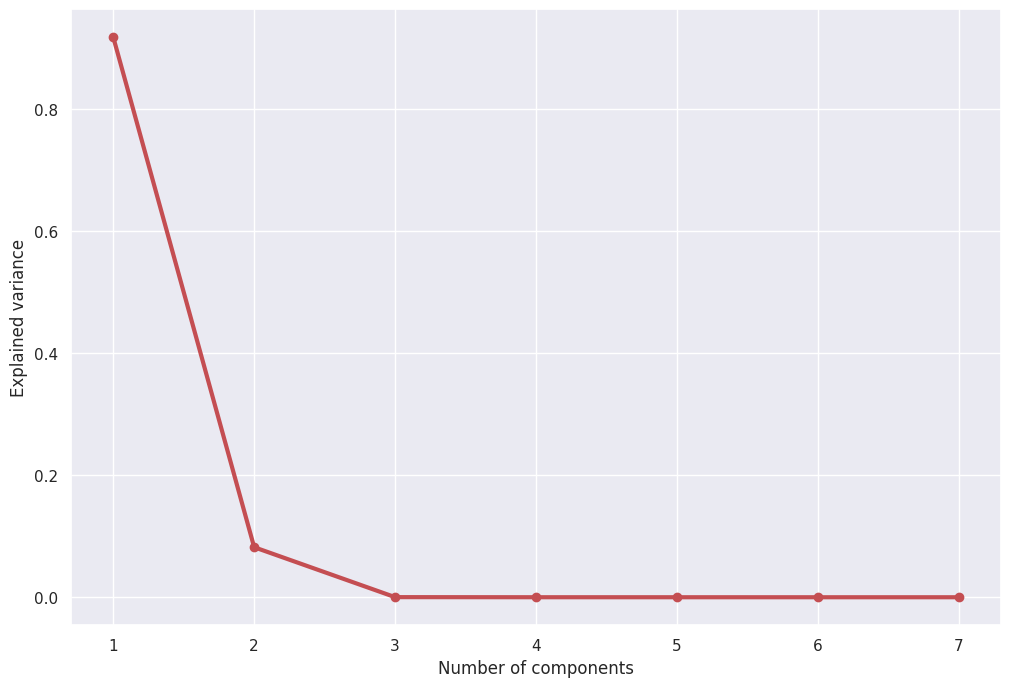

In [ ]:
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

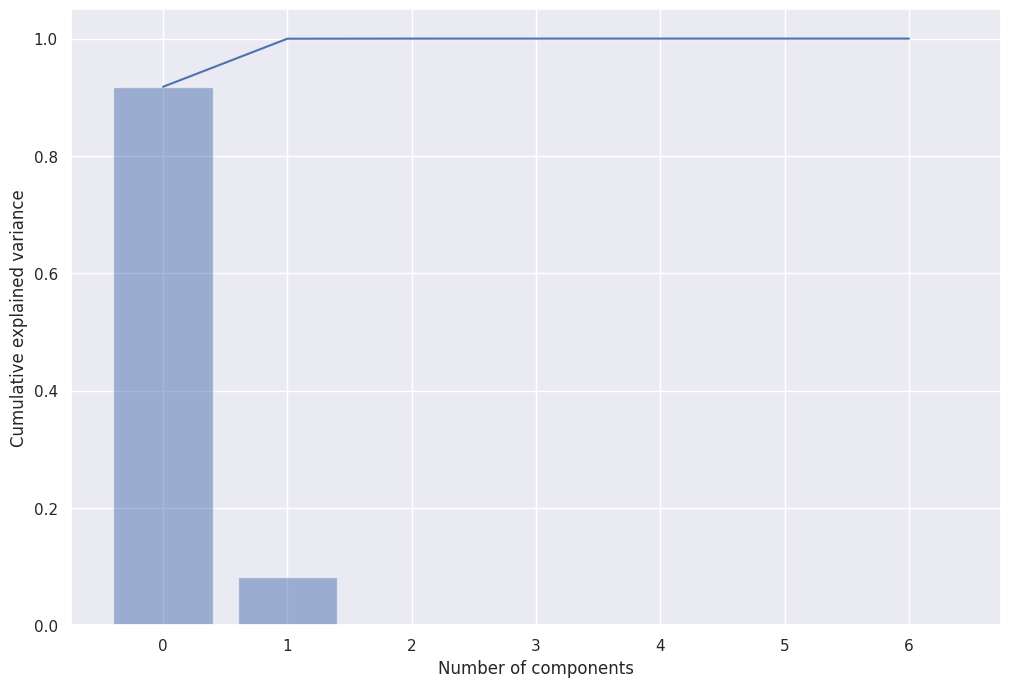

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (91.8%)',
 '1': 'PC 2 (8.2%)',
 '2': 'PC 3 (0.0%)',
 '3': 'PC 4 (0.0%)',
 '4': 'PC 5 (0.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)'}

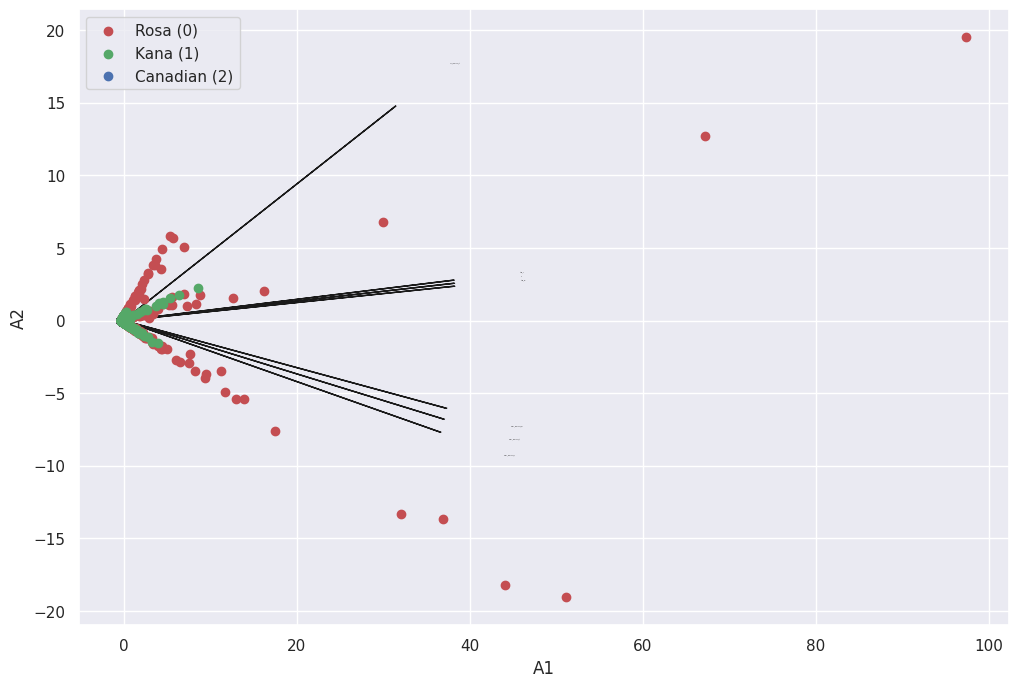

In [ ]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
print(out['topfeat'])

    PC          feature   loading  type
0  PC1          total_m  0.392847  best
1  PC2   curr_married_t  0.757691  best
2  PC1                s  0.392552  weak
3  PC1          total_f  0.392195  weak
4  PC1  never_married_t  0.380509  weak
5  PC1  never_married_m  0.383352  weak
6  PC2  never_married_f -0.394659  weak


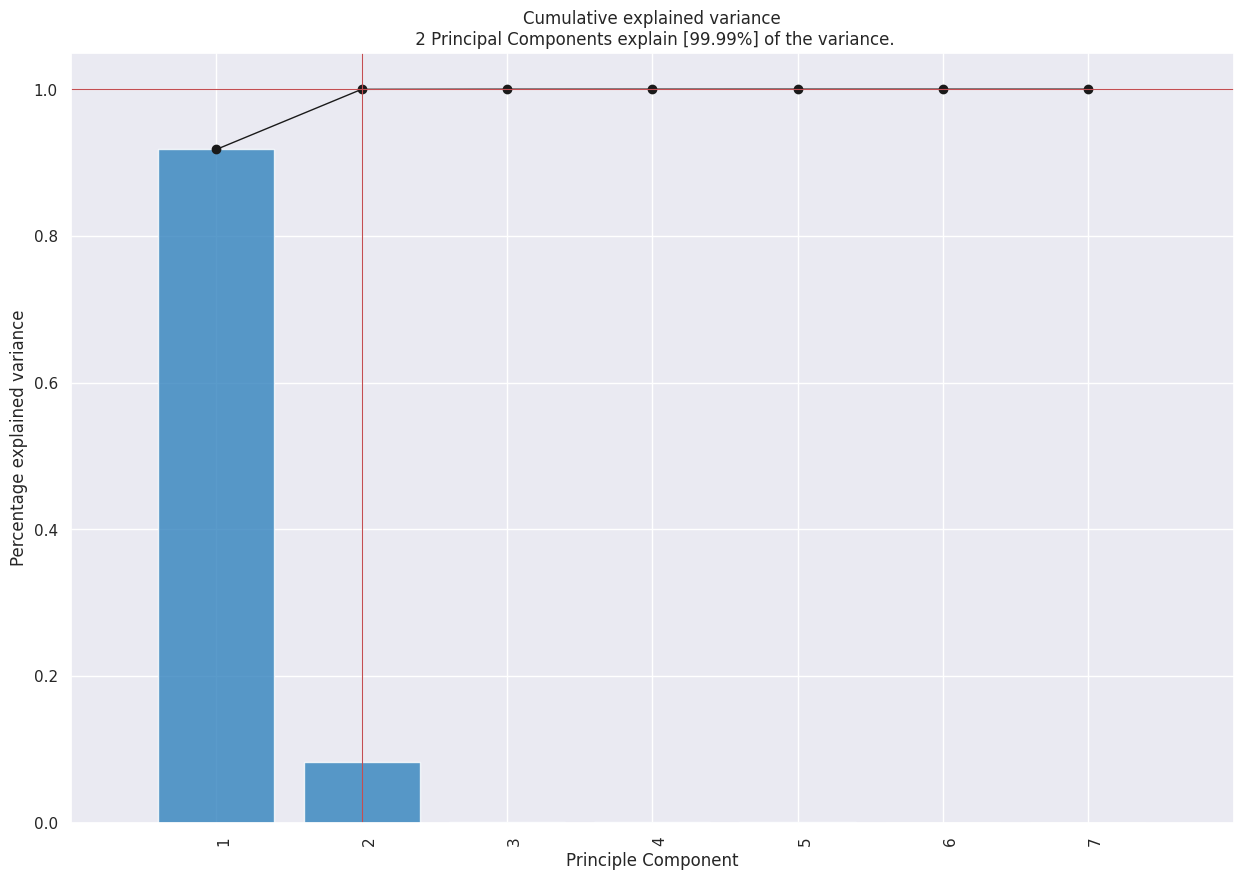

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


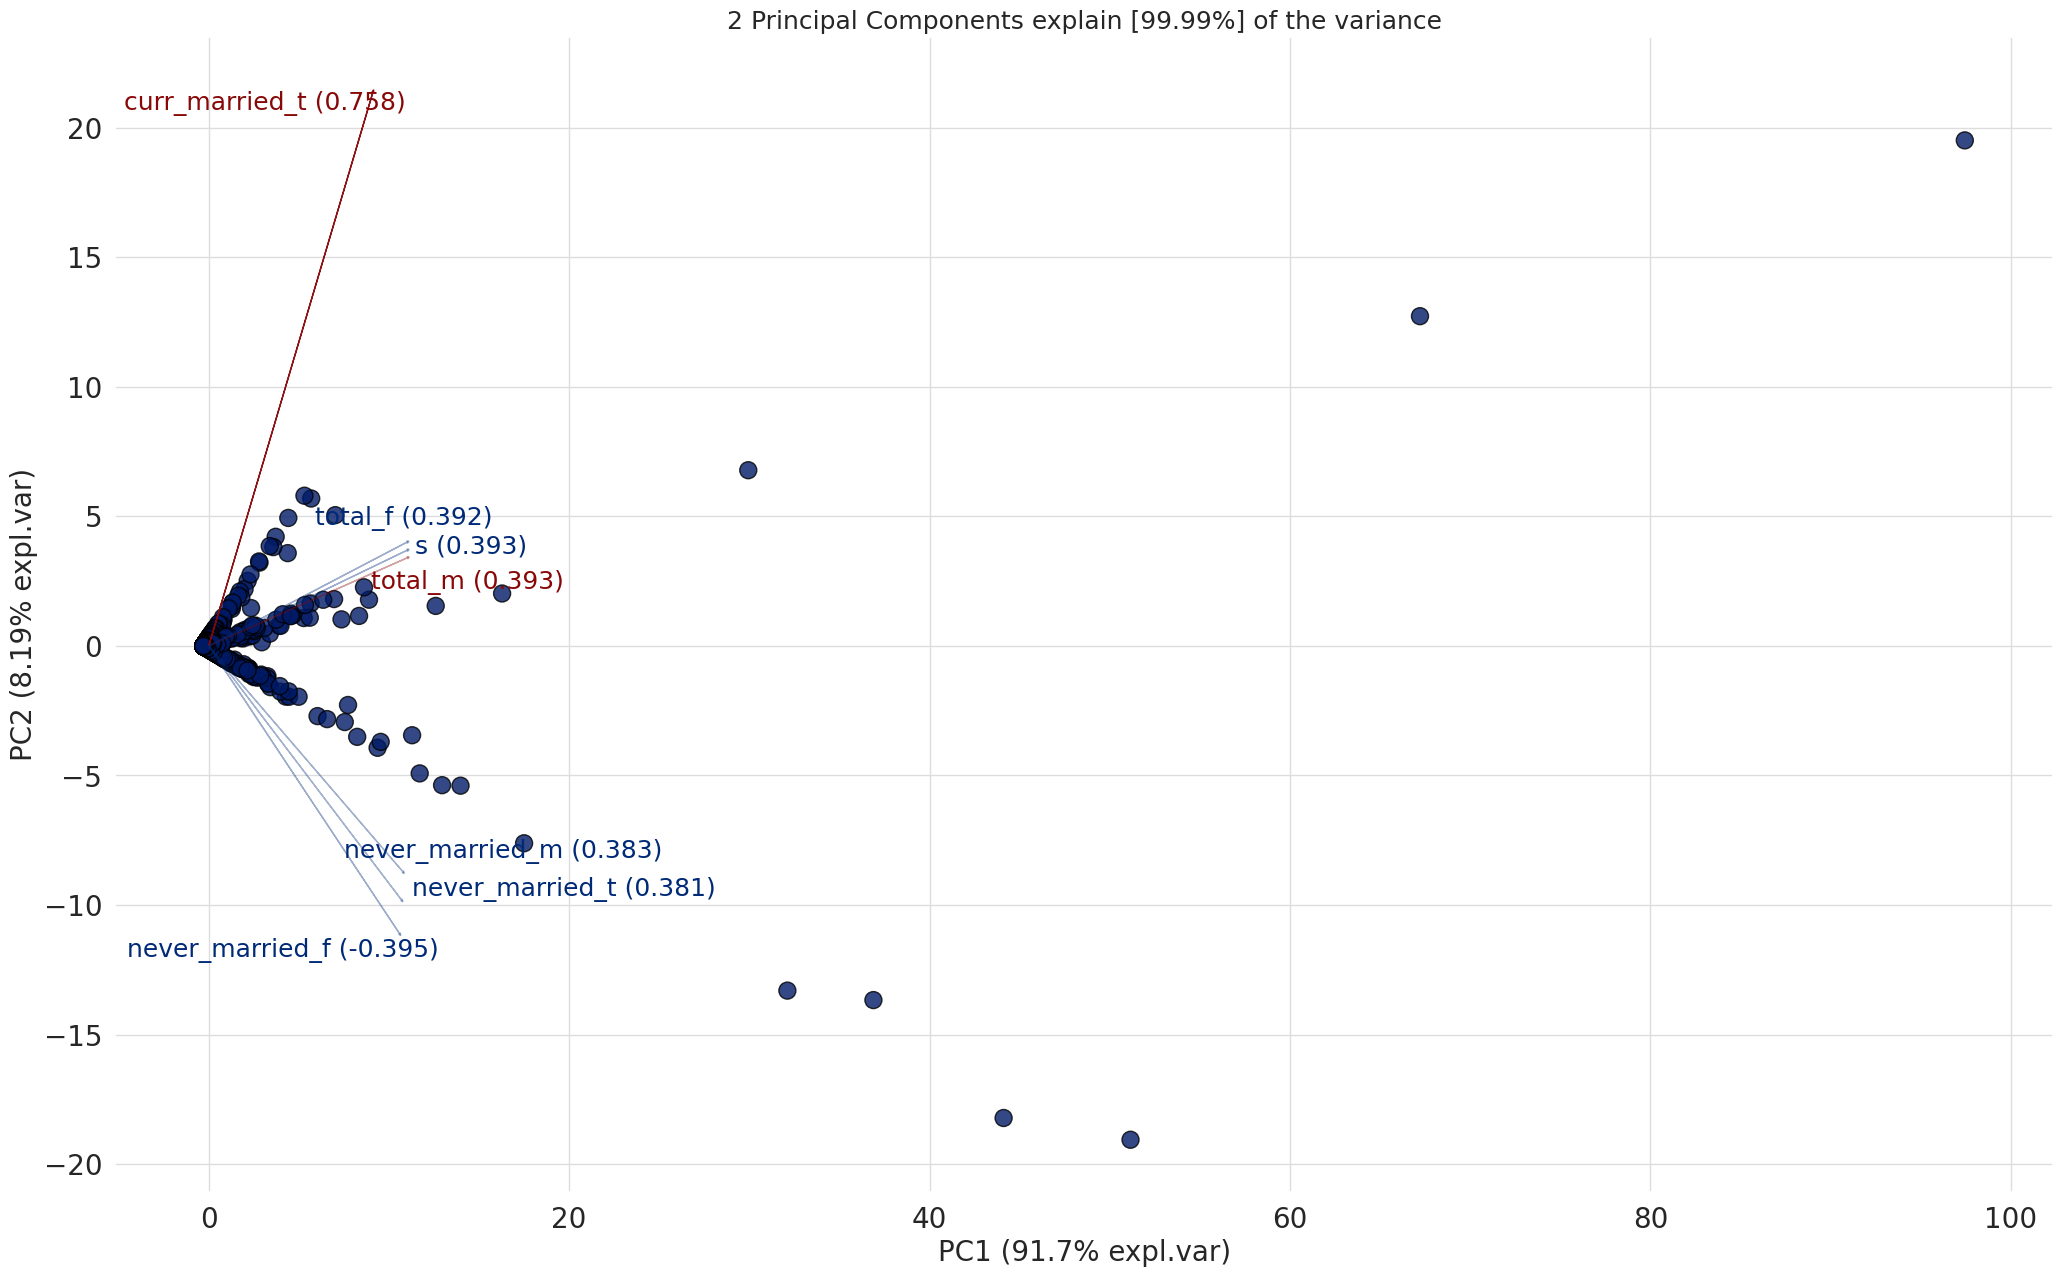

In [ ]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (91.7% expl.var)', ylabel='PC2 (8.19% expl.var)'>)

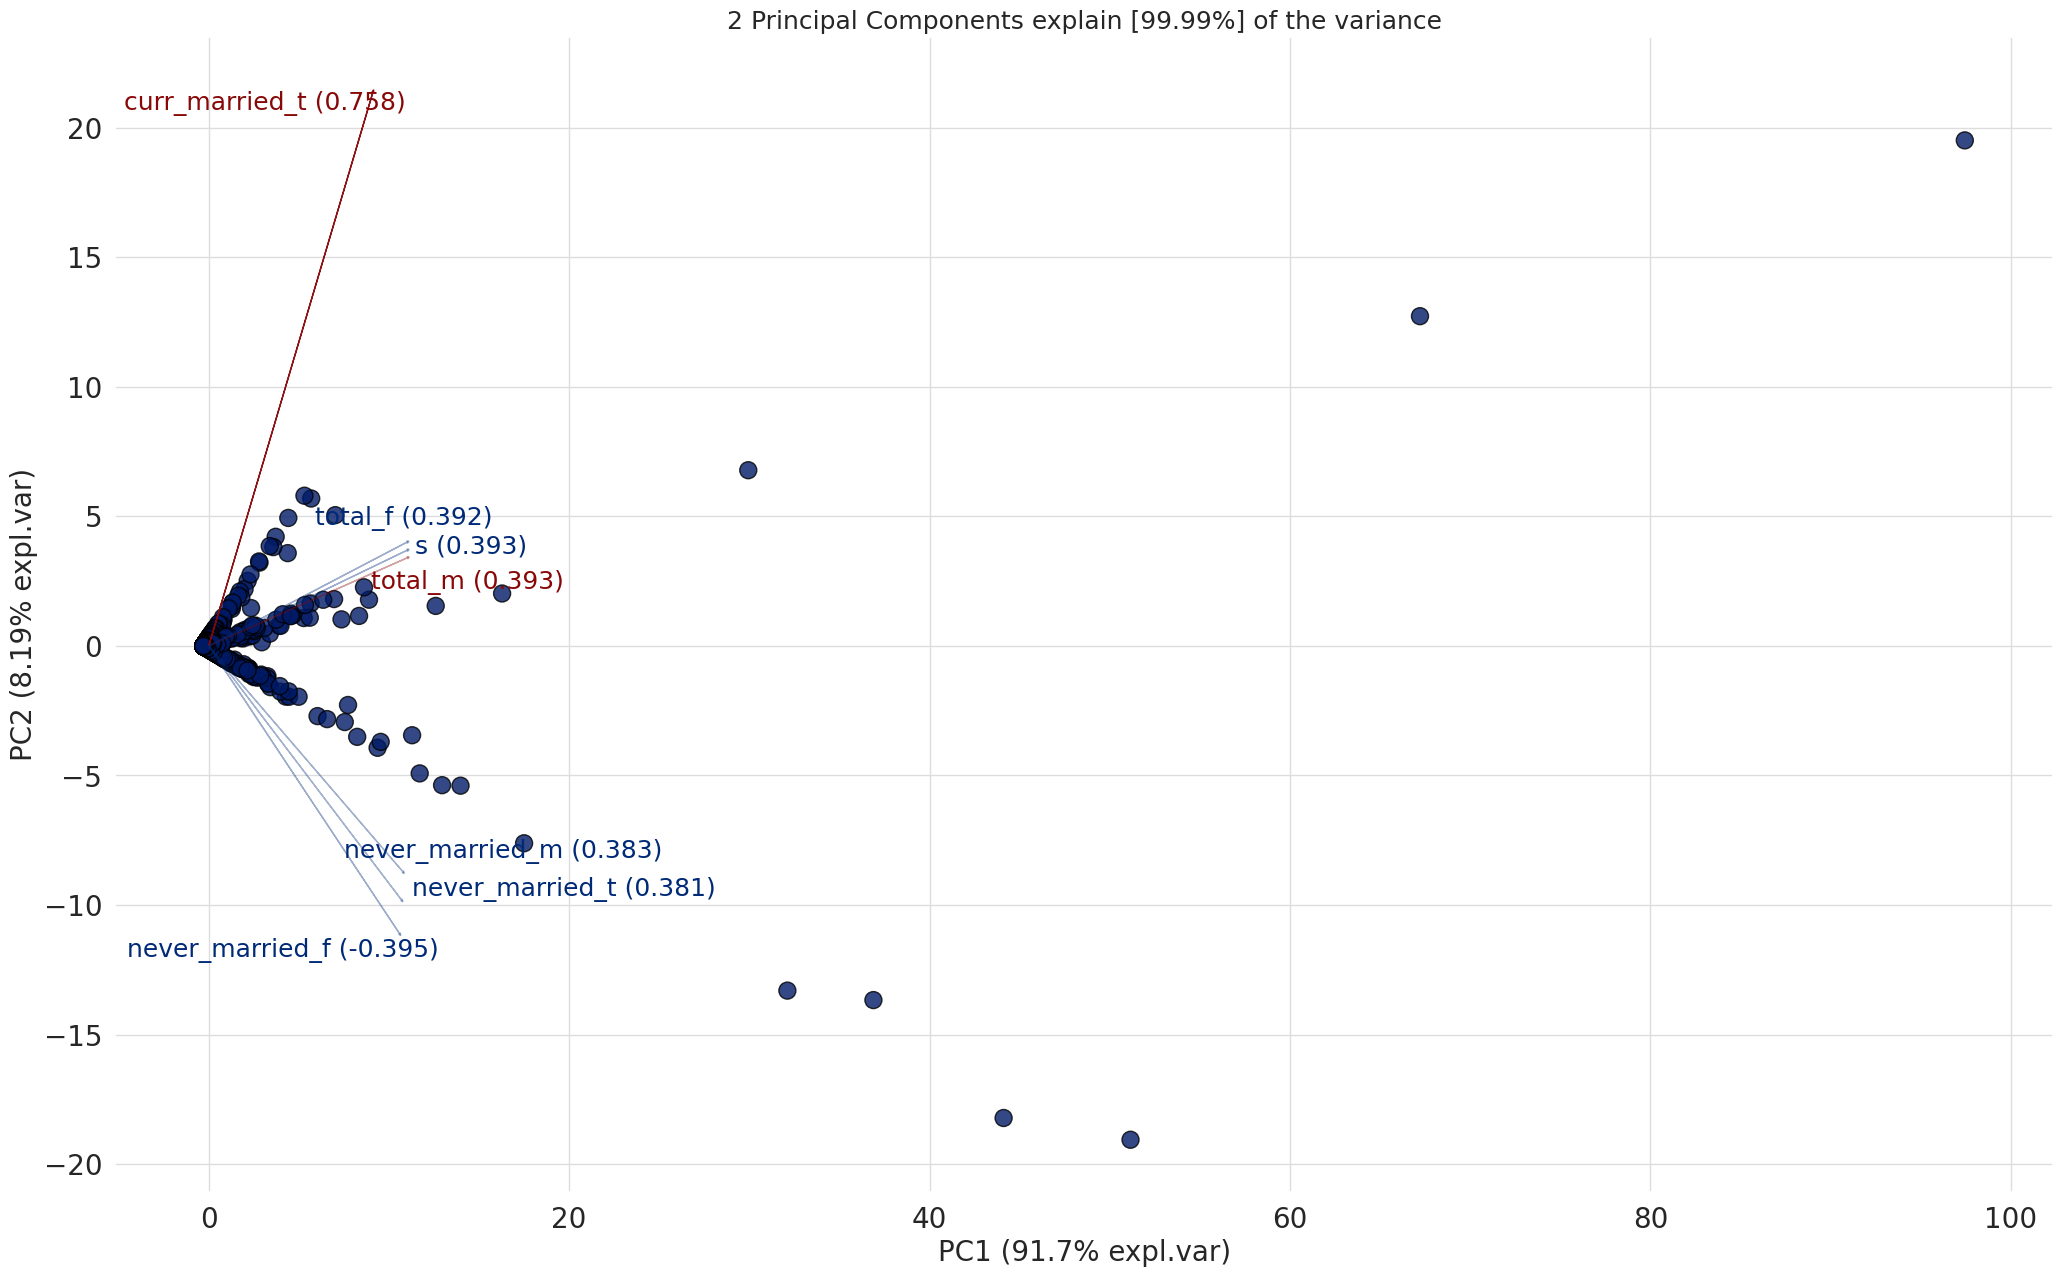

In [ ]:
model.biplot(legend=False, label=True)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (91.7% expl.var)', ylabel='PC2 (8.19% expl.var)'>)

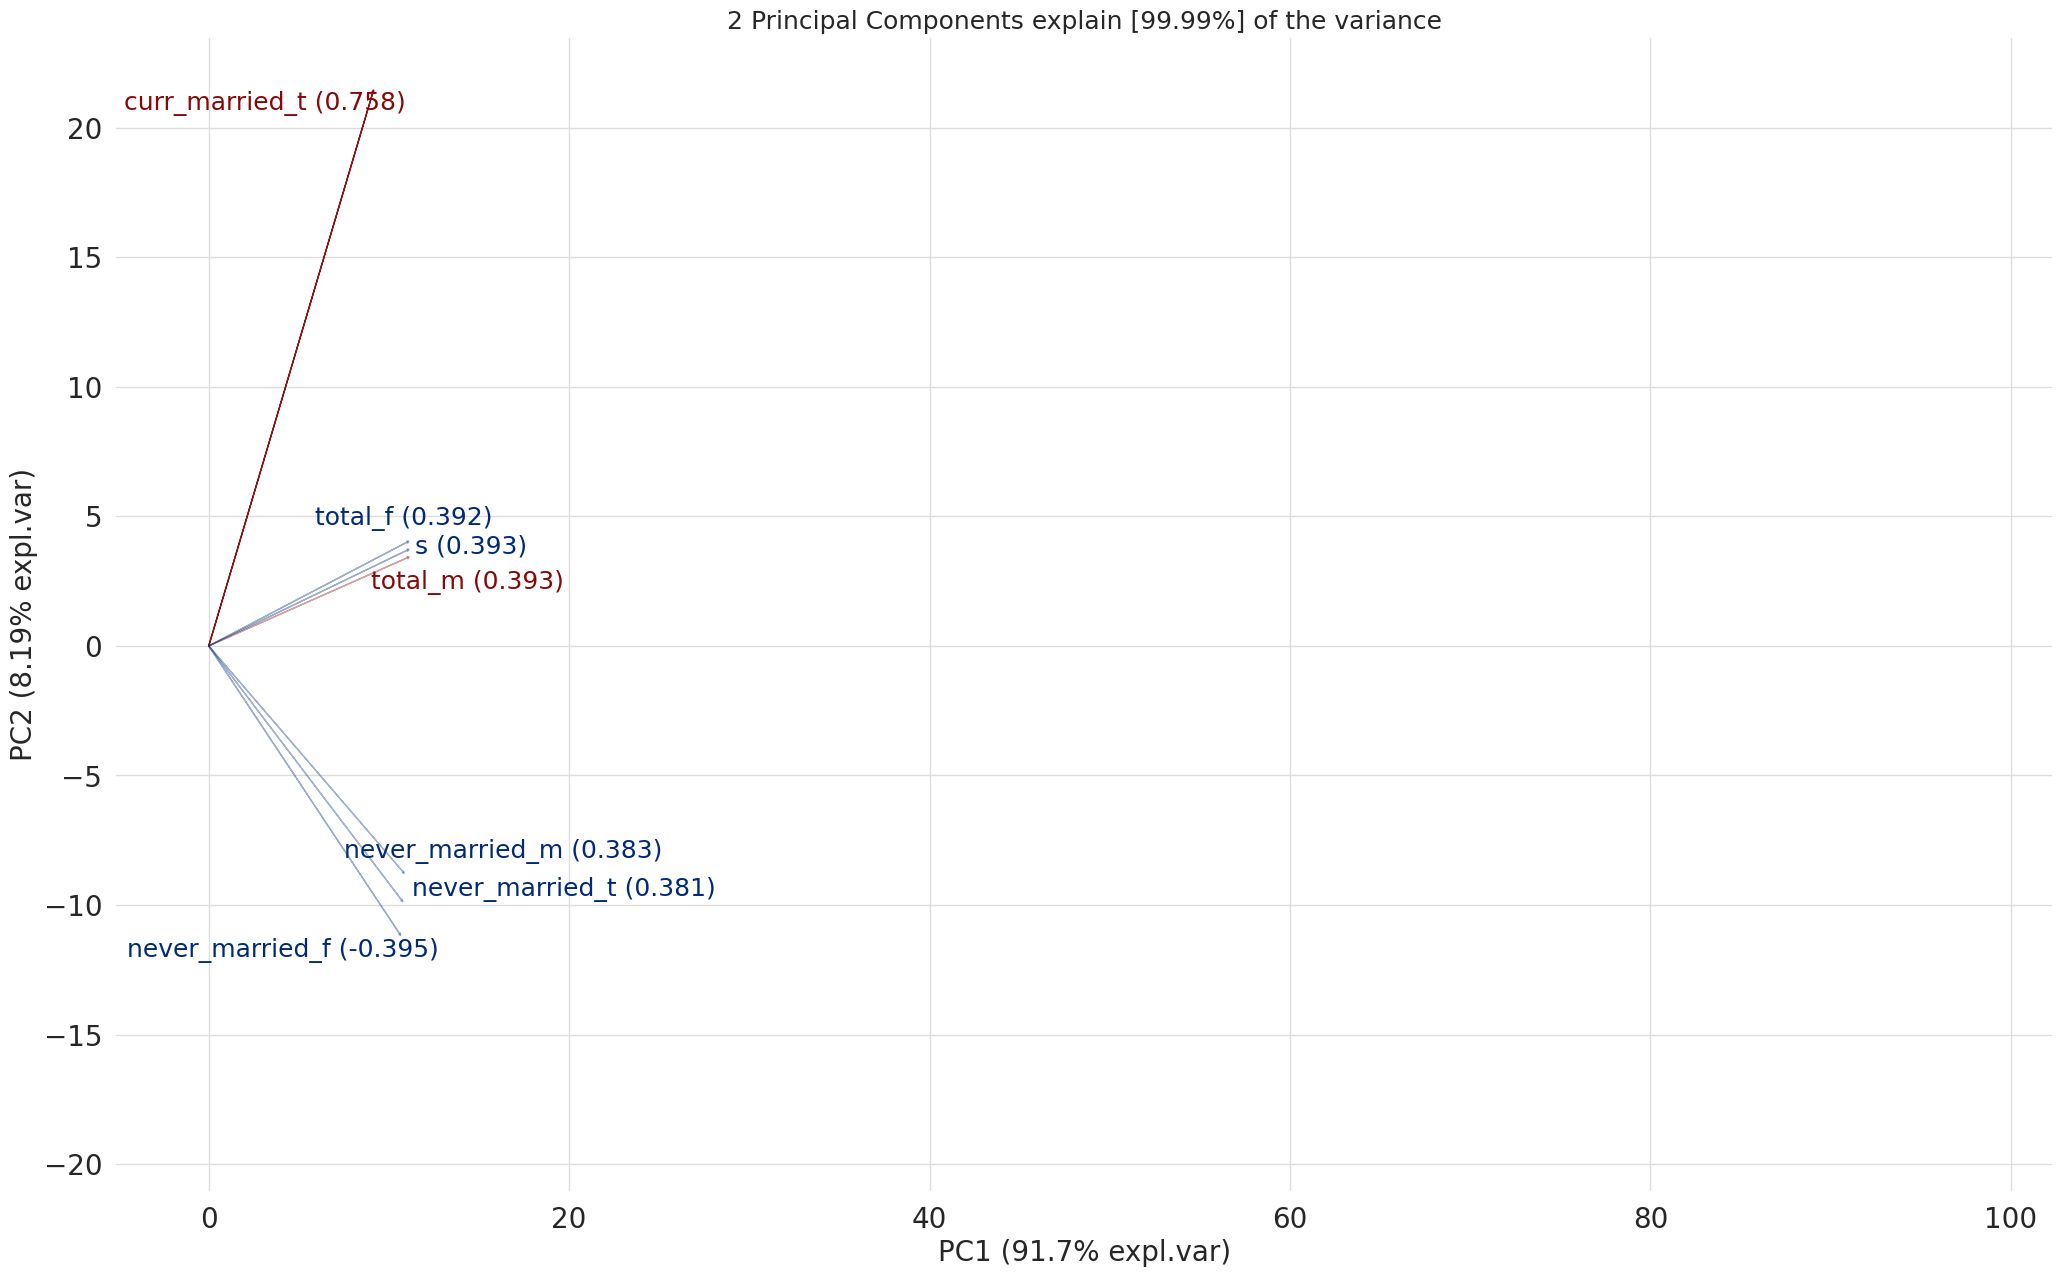

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

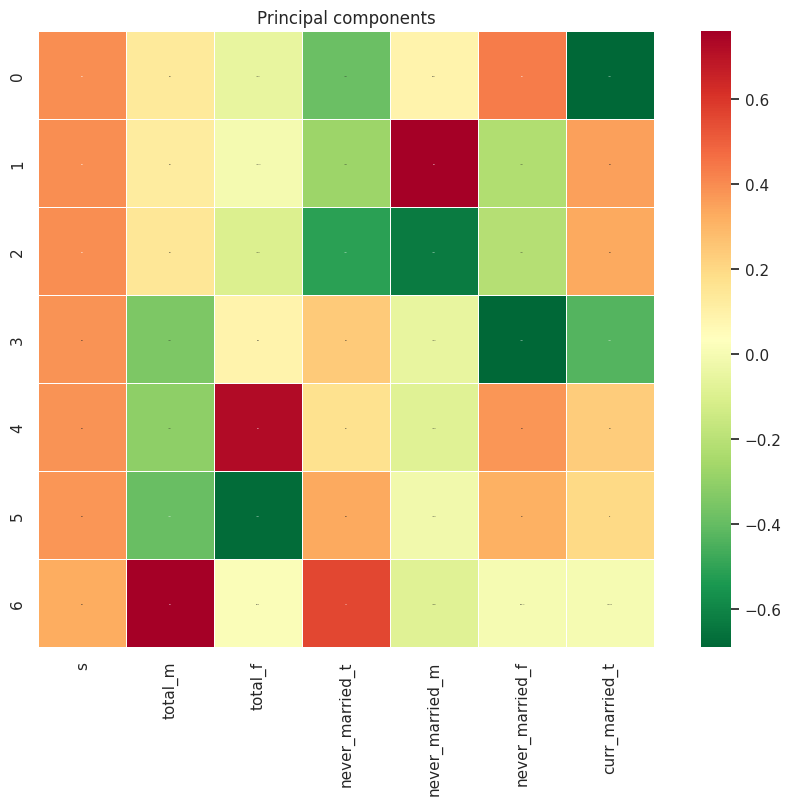

PC1:[0.39255214 0.39284724 0.39219472 0.38050924 0.38335162 0.3763579
 0.32305749]
PC2:[ 0.13165201  0.12126854  0.14274488 -0.34869975 -0.31006876 -0.39465895
  0.75769107]


In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)

plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

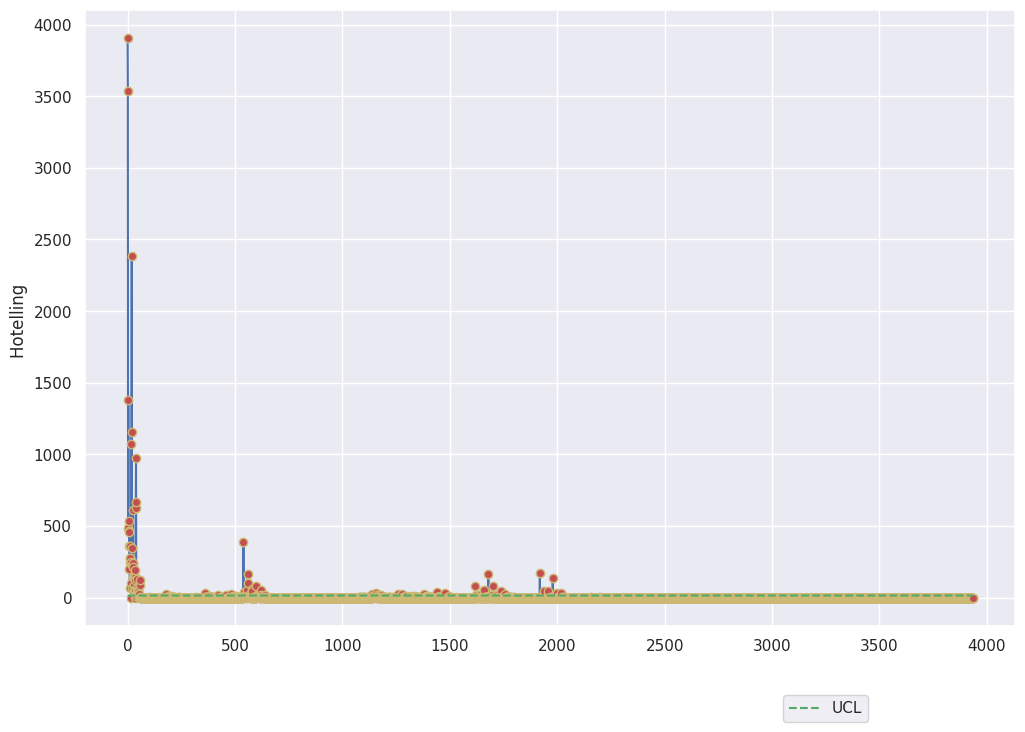

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling ')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[   0]
 [   1]
 [   2]
 [   3]
 [   4]
 [   5]
 [   6]
 [   7]
 [   8]
 [   9]
 [  10]
 [  11]
 [  12]
 [  13]
 [  14]
 [  15]
 [  17]
 [  18]
 [  19]
 [  20]
 [  21]
 [  22]
 [  23]
 [  24]
 [  25]
 [  26]
 [  27]
 [  28]
 [  29]
 [  30]
 [  31]
 [  32]
 [  33]
 [  34]
 [  35]
 [  37]
 [  38]
 [  39]
 [  40]
 [  42]
 [  43]
 [  44]
 [  45]
 [  46]
 [  47]
 [  48]
 [  49]
 [  50]
 [  51]
 [  52]
 [  53]
 [  55]
 [  57]
 [  58]
 [ 179]
 [ 359]
 [ 419]
 [ 459]
 [ 479]
 [ 539]
 [ 542]
 [ 543]
 [ 545]
 [ 557]
 [ 558]
 [ 559]
 [ 563]
 [ 577]
 [ 578]
 [ 579]
 [ 599]
 [ 602]
 [ 618]
 [ 619]
 [ 622]
 [ 638]
 [1139]
 [1157]
 [1158]
 [1159]
 [1178]
 [1259]
 [1279]
 [1379]
 [1439]
 [1479]
 [1619]
 [1623]
 [1638]
 [1639]
 [1659]
 [1679]
 [1698]
 [1699]
 [1719]
 [1739]
 [1759]
 [1919]
 [1939]
 [1959]
 [1979]
 [1999]
 [2019]]


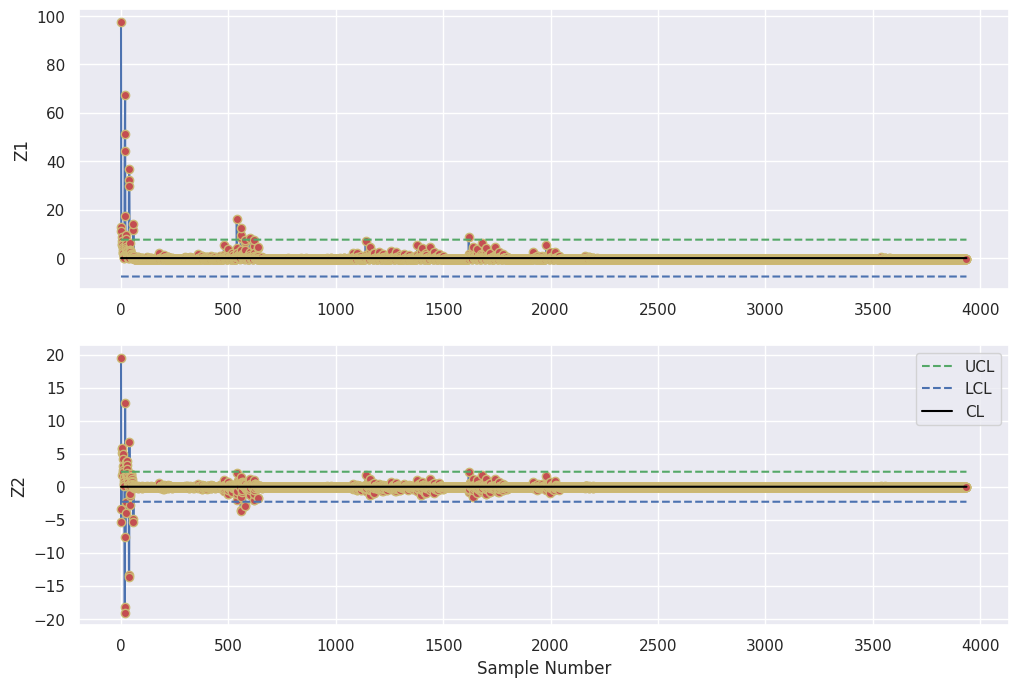

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('Z1')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('Z2')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[   0]
 [   1]
 [   2]
 [   3]
 [  17]
 [  18]
 [  19]
 [  20]
 [  21]
 [  22]
 [  37]
 [  38]
 [  39]
 [  57]
 [  58]
 [ 539]
 [ 557]
 [ 558]
 [ 559]
 [ 599]
 [1619]]
[[  1]
 [  2]
 [ 17]
 [ 18]
 [ 20]
 [ 21]
 [ 22]
 [ 37]
 [ 38]
 [ 40]
 [ 57]
 [ 58]
 [557]
 [558]
 [577]
 [578]]
[[ 0]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [19]
 [24]
 [25]
 [26]
 [27]
 [28]
 [39]]


In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 2755
Test Dataset Size: 1182


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.862     0.107     0.190       469
           1      0.627     0.989     0.768       713

    accuracy                          0.639      1182
   macro avg      0.745     0.548     0.479      1182
weighted avg      0.720     0.639     0.538      1182



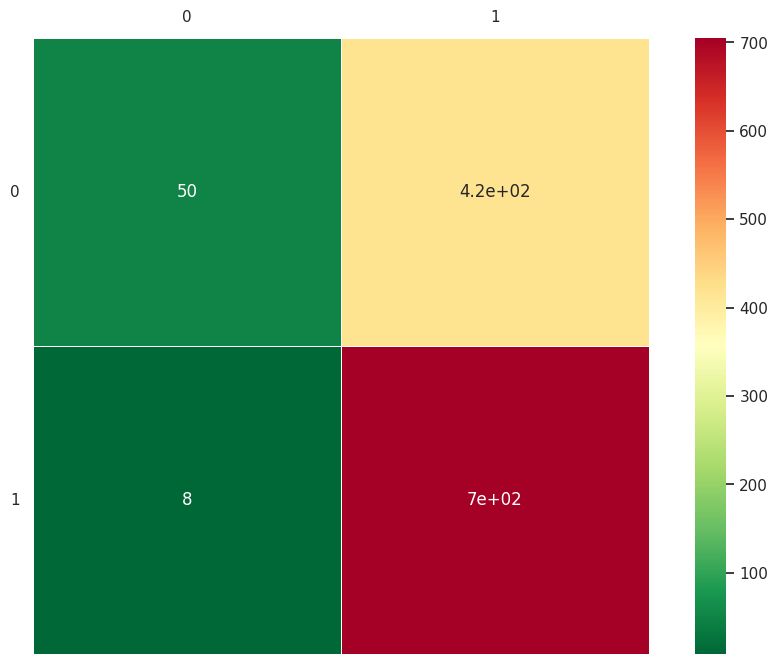

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.837     0.164     0.275       469
           1      0.640     0.979     0.774       713

    accuracy                          0.656      1182
   macro avg      0.739     0.572     0.524      1182
weighted avg      0.718     0.656     0.576      1182



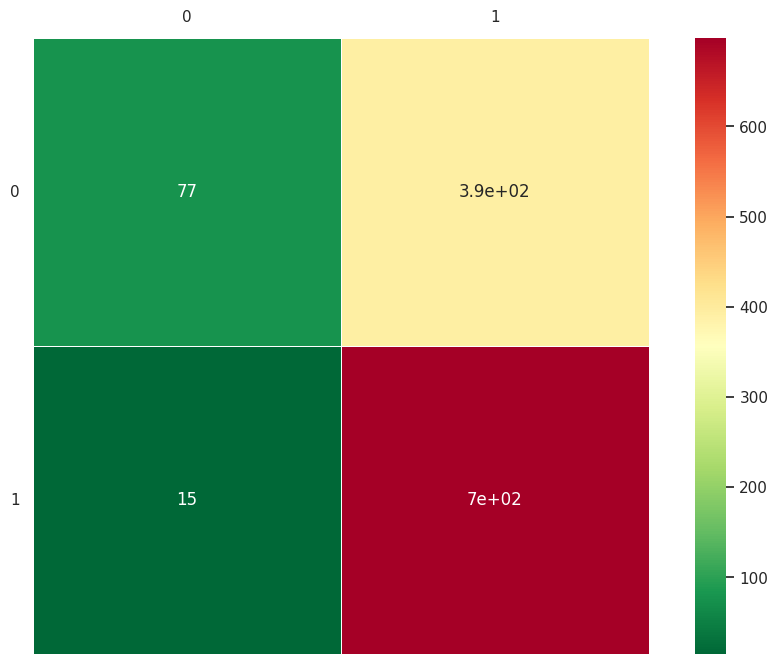

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.866     0.124     0.216       469
           1      0.631     0.987     0.770       713

    accuracy                          0.645      1182
   macro avg      0.749     0.556     0.493      1182
weighted avg      0.724     0.645     0.550      1182



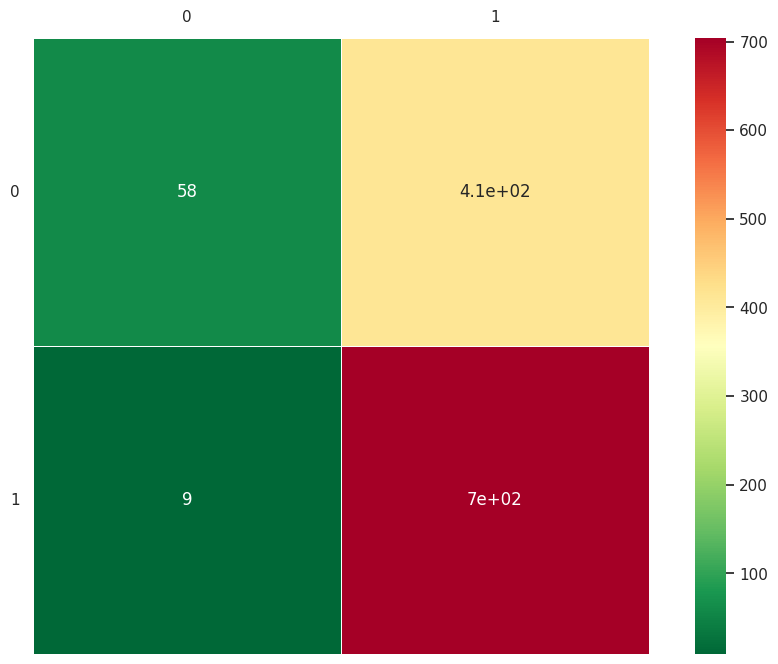

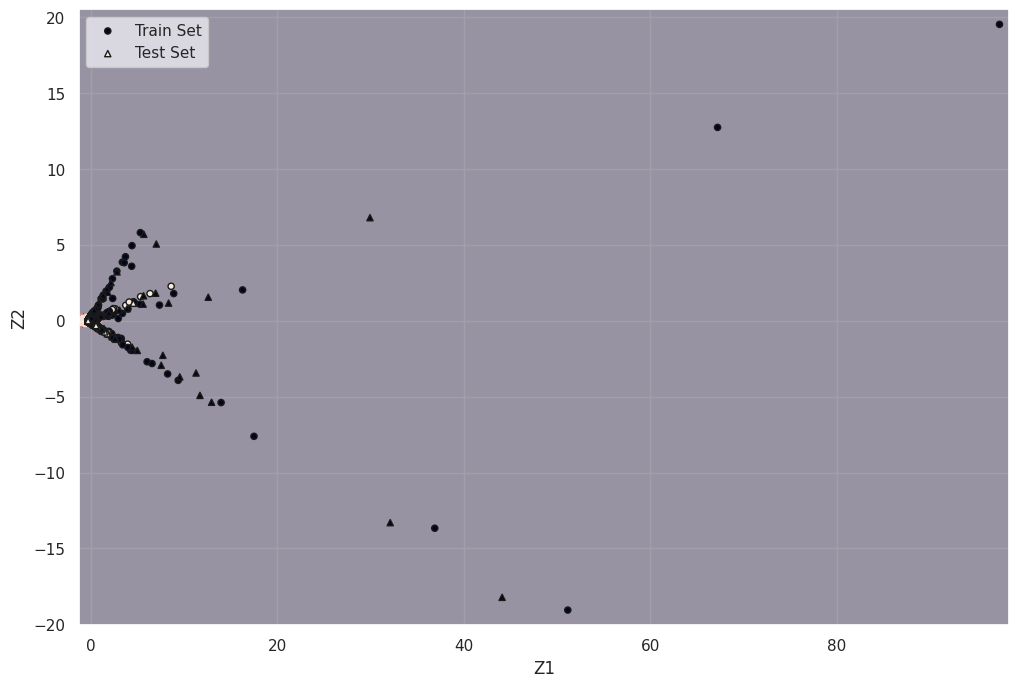

(array([   3,    4,    6,   13,   14,   17,   19,   20,   24,   28,   29,
         30,   42,   44,   46,   51,   57,   61,   62,   65,   67,   69,
         73,   78,   81,   85,   88,   91,   97,  100,  103,  104,  106,
        108,  109,  111,  117,  118,  128,  137,  138,  142,  145,  146,
        147,  148,  149,  153,  154,  156,  158,  161,  162,  163,  166,
        167,  169,  170,  173,  177,  180,  181,  185,  186,  189,  190,
        191,  193,  195,  198,  201,  203,  207,  216,  218,  221,  223,
        225,  229,  234,  236,  241,  242,  248,  251,  253,  254,  255,
        256,  259,  260,  263,  265,  271,  277,  283,  284,  287,  290,
        291,  292,  300,  302,  303,  306,  308,  311,  318,  321,  327,
        328,  331,  339,  341,  344,  347,  350,  352,  353,  356,  357,
        359,  360,  363,  364,  366,  367,  369,  375,  384,  388,  390,
        391,  397,  399,  402,  404,  405,  406,  408,  411,  412,  413,
        414,  415,  416,  420,  422,  423,  425,  

In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

NameError: name 'KNeighborsClassifier' is not defined